# Setup

In [1]:
import pandas as pd
import statistics as st
import matplotlib as plt
import seaborn as sns

# Bevölkerung Deutschlands
p = 83e6

# Dauer der Infetiosität
d1 = 10

# Dauer der Immunität
d2 = 180

# Neuinfektionen
df1 = pd.read_csv('https://raw.githubusercontent.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung/main/Nowcast_R_aktuell.csv')
df1 = df1[['Datum', 'PS_COVID_Faelle_ma4']]
df1.rename(inplace=True, columns={'Datum': 'date', 'PS_COVID_Faelle_ma4': 'cases'})

# Impfungen
df2 = pd.read_csv('https://impfdashboard.de/static/data/germany_vaccinations_timeseries_v3.tsv', sep='\t')
df2 = df2[['date', 'impfungen','impfquote_boost1']]
df2.rename(inplace=True, columns={'date': 'date', 'impfungen': 'vaccinations', 'impfquote_boost1': 'boost'})

# Intensivbelegung
df3 = pd.read_csv('https://diviexchange.blob.core.windows.net/%24web/zeitreihe-deutschland.csv')
df3 = df3.loc[df3['Behandlungsgruppe'] == 'ERWACHSENE']
df3 = df3[['Datum', 'Aktuelle_COVID_Faelle_ITS', 'Belegte_Intensivbetten', 'Freie_Intensivbetten']]
df3.rename(inplace=True, columns={'Datum':'date','Aktuelle_COVID_Faelle_ITS':'covid','Belegte_Intensivbetten':'occupied','Freie_Intensivbetten':'free'})
df3.reset_index(drop=True, inplace=True)

# Initial state

In [2]:
i = sum(df1['cases'][-d1:]) # infected
r1 = sum(df1['cases'][-d2:-d1]) # recovered
r2 = df2['boost'].iloc[-1] # boosted

i *= 2/p
r = r1/p + r2
s = 1 - i - r

print(f"recovered: {r1/p}")
print(f"boosted: {r2}\n")


print(f"group: {'share':<6} | amount")
print(f"s    : {s:<8.3g} | {s*p:.2g}")
print(f"i    : {i:<8.3g} | {i*p:.2g}")
print(f"r    : {r:<8.3g} | {r*p:.2g}")

recovered: 0.18204346987951808
boosted: 0.62042

group: share  | amount
s    : 0.191    | 1.6e+07
i    : 0.0069   | 5.7e+05
r    : 0.802    | 6.7e+07


# Vaccinations

In [4]:
# Durschnittliche tägliche Impfungen 2022
v1 = st.mean(df2['vaccinations'][df2['date'].str.contains('2022')])

# Maximale täglicheImpfungen
v2 = df2['vaccinations'].iloc[df2['vaccinations'].idxmax()]

print(f"average year   : {v1/p:<6.2g} | {n2:>7.0f}")
print(f"maximum        : {v2/p:<6.2g} | {n3:>7.0f}")

average alltime: 0.0036 |  300411
average year   : 0.0015 |  125932
maximum        : 0.019  | 1561192


# Health System

In [3]:
# Maximale Anzahl von gleichzeitig auf der Intensivstation behandelten Covid-19 Patienten
icu_max = df3['covid'].iloc[df3['covid'].idxmax()]
# Maximale Anzahl von gleichzeitig mit Covid-19 Infizierten
i_max = icu_max / 0.003 / 0.1

print(f"maximum of icu covid patients  : {icu_max:>.3g}")
print(f"maximum of infected individuals: {i_max:>.3g}")

maximum of icu covid patients  : 5.74e+03
maximum of infected individuals: 1.92e+07


# Plots

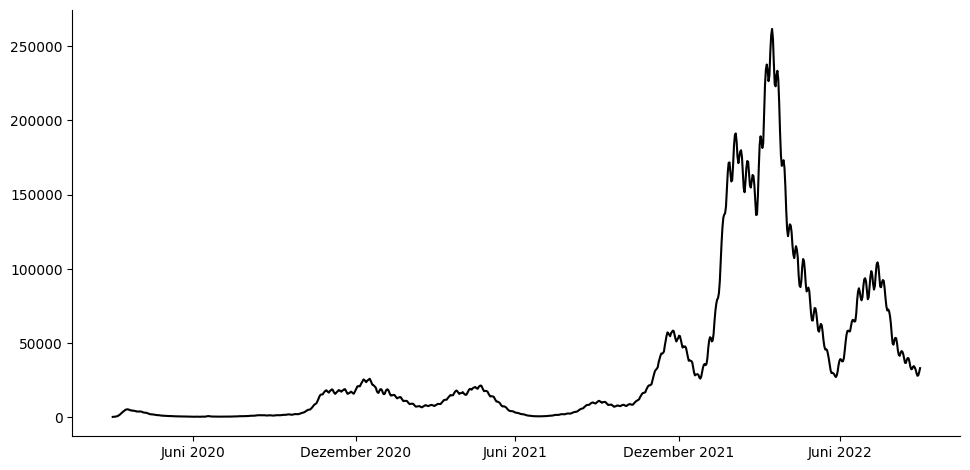

In [76]:
# cases

sns.relplot(x=df1.index, y='cases', data=df1, kind='line', color='k', aspect=2)
plt.xlabel('')
plt.ylabel('')
plt.xticks([91,274,454,639,821],['Juni 2020','Dezember 2020','Juni 2021','Dezember 2021','Juni 2022'])
# plt.savefig('cases.pdf')
plt.show()

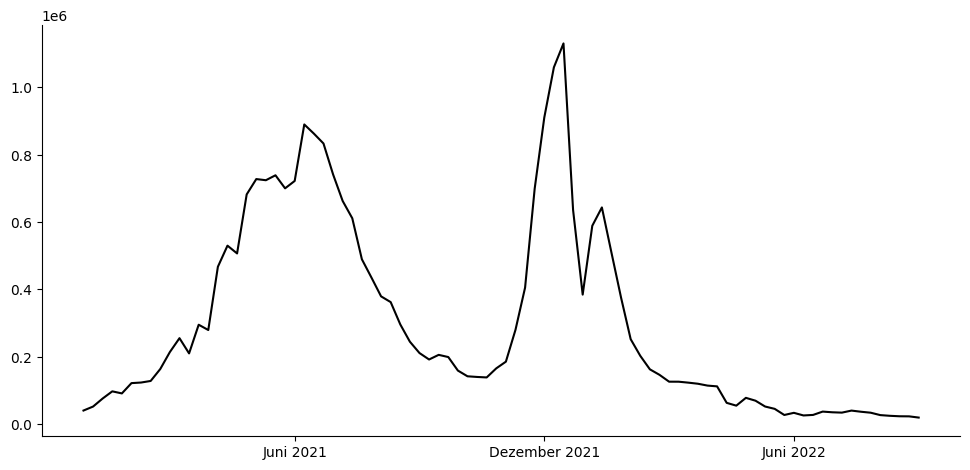

In [77]:
# vaccinations

v = df2[['date','vaccinations']]
v = v.groupby(v.index // 7).sum() / 7

sns.relplot(x=v.index, y='vaccinations', data=v, kind='line', color='k', aspect=2)
plt.xlabel('')
plt.ylabel('')
plt.xticks([22,48,74],['Juni 2021','Dezember 2021','Juni 2022'])
plt.savefig('vaccination.pdf')
plt.show()

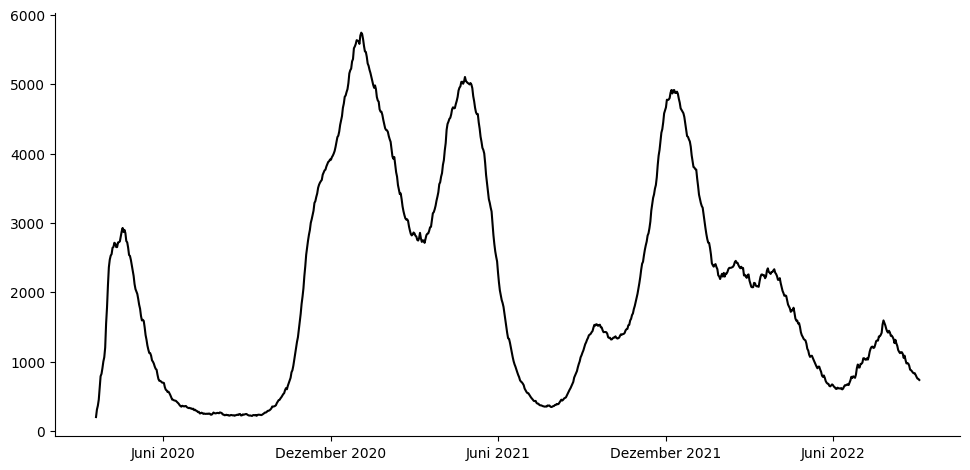

In [78]:
# ICU

sns.relplot(x=df3.index, y='covid', data=df3, kind='line', color='k', aspect=2)
plt.xlabel('')
plt.ylabel('')
plt.xticks([73,256,438,621,803],['Juni 2020','Dezember 2020','Juni 2021','Dezember 2021','Juni 2022'])
# plt.savefig('icu.pdf')
plt.show()